# **Divvy's Trips Data Analysis**

## **Objective**

There are two kinds of customers using Divvy's Bike-sharing service, those are casual riders (Customers who purchase single-ride or full-day passes) and members (customers who purchase annual memberships). The objective of this analysis is to design marketing strategies aimed at converting casual riders to annual members.

## **Questions to be Answered**

There are questions or business tasks need to be answered for this analysis:
1. What is the weekly average of ride length for casual riders and members?
2. Is there a correlation between the seasons in chicago and number of rides?
3. Is there a correlation between the seasons in chicago and ride length?
4. What is the average number of rides on each name of the day of the week??
5. What is the average ride length on each name of the day of the week?
6. Which stations do casual riders often visit?



### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

### Read files needed

In [3]:
# Read csv files

bike_data1 = pd.read_csv('/Users/yashpradhan/Desktop/UNC Charlotte/Sem Fall 2023/Big Data Analytics/Project/divvyData/202210-divvy-tripdata.csv')
bike_data2 = pd.read_csv('/Users/yashpradhan/Desktop/UNC Charlotte/Sem Fall 2023/Big Data Analytics/Project/divvyData/202211-divvy-tripdata.csv')
bike_data3 = pd.read_csv('/Users/yashpradhan/Desktop/UNC Charlotte/Sem Fall 2023/Big Data Analytics/Project/divvyData/202212-divvy-tripdata.csv')
bike_data4 = pd.read_csv('/Users/yashpradhan/Desktop/UNC Charlotte/Sem Fall 2023/Big Data Analytics/Project/divvyData/202301-divvy-tripdata.csv')
bike_data5 = pd.read_csv('/Users/yashpradhan/Desktop/UNC Charlotte/Sem Fall 2023/Big Data Analytics/Project/divvyData/202302-divvy-tripdata.csv')
bike_data6 = pd.read_csv('/Users/yashpradhan/Desktop/UNC Charlotte/Sem Fall 2023/Big Data Analytics/Project/divvyData/202303-divvy-tripdata.csv')
bike_data7 = pd.read_csv('/Users/yashpradhan/Desktop/UNC Charlotte/Sem Fall 2023/Big Data Analytics/Project/divvyData/202304-divvy-tripdata.csv')
bike_data8 = pd.read_csv('/Users/yashpradhan/Desktop/UNC Charlotte/Sem Fall 2023/Big Data Analytics/Project/divvyData/202305-divvy-tripdata.csv')
bike_data9 = pd.read_csv('/Users/yashpradhan/Desktop/UNC Charlotte/Sem Fall 2023/Big Data Analytics/Project/divvyData/202306-divvy-tripdata.csv')
bike_data10 = pd.read_csv('/Users/yashpradhan/Desktop/UNC Charlotte/Sem Fall 2023/Big Data Analytics/Project/divvyData/202307-divvy-tripdata.csv')
bike_data11 = pd.read_csv('/Users/yashpradhan/Desktop/UNC Charlotte/Sem Fall 2023/Big Data Analytics/Project/divvyData/202308-divvy-tripdata.csv')
bike_data12 = pd.read_csv('/Users/yashpradhan/Desktop/UNC Charlotte/Sem Fall 2023/Big Data Analytics/Project/divvyData/202309-divvy-tripdata.csv')

# Merge the datasets into one dataset using concat. (Number of columns and column names are the same for each dataset)
data = [bike_data1, bike_data2, bike_data3, bike_data4, 
        bike_data5, bike_data6, bike_data7, bike_data8, 
        bike_data9, bike_data10, bike_data11, bike_data12]

bike_data = pd.concat(data)

### Informations about the dataset

In [4]:
bike_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A50255C1E17942AB,classic_bike,2022-10-14 17:13:30,2022-10-14 17:19:39,Noble St & Milwaukee Ave,13290,Larrabee St & Division St,KA1504000079,41.900680,-87.662600,41.903486,-87.643353,member
1,DB692A70BD2DD4E3,electric_bike,2022-10-01 16:29:26,2022-10-01 16:49:06,Damen Ave & Charleston St,13288,Damen Ave & Cullerton St,13089,41.920037,-87.677937,41.854967,-87.675700,casual
2,3C02727AAF60F873,electric_bike,2022-10-19 18:55:40,2022-10-19 19:03:30,Hoyne Ave & Balmoral Ave,655,Western Ave & Leland Ave,TA1307000140,41.979879,-87.681902,41.966400,-87.688704,member
3,47E653FDC2D99236,electric_bike,2022-10-31 07:52:36,2022-10-31 07:58:49,Rush St & Cedar St,KA1504000133,Orleans St & Chestnut St (NEXT Apts),620,41.902274,-87.627692,41.898203,-87.637536,member
4,8B5407BE535159BF,classic_bike,2022-10-13 18:41:03,2022-10-13 19:26:18,900 W Harrison St,13028,Adler Planetarium,13431,41.874754,-87.649807,41.866095,-87.607267,casual


In [5]:
# Information about data types for each column, total number of rows, total number of columns
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5674399 entries, 0 to 666370
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 606.1+ MB


In [9]:
# Number of unique values in each columns
bike_data.nunique()
bike_data.shape

(5674399, 13)

In [7]:
# Checking missing values / missing data
bike_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    873186
start_station_id      873318
end_station_name      926160
end_station_id        926301
start_lat                  0
start_lng                  0
end_lat                 6642
end_lng                 6642
member_casual              0
dtype: int64

### **Clean the data and Prepare for Exploration!**

As we can see from the informations above, the dataset needs to be cleaned before we go to the next step.
1. Remove unwanted columns
> * Remove `start_lat`, `start_lng`, `end lat`, `end_lng` columns because these columns are not needed for this analysis
> * Remove `start_station_id`, `end_station_id`, `ride_id` columns, because these columns are not relevant for this analysis

2. Fixing inconsistent station names
> * There are some stations that has `(*)` or `(Temp)` at the end of the station name, for examples are Smith Park Station and Wood St & Taylor St. There are `Smith Park` and `Smith Park (*)`, `Wood St & Taylor St` and `Wood St & Taylor St (Temp)` in the data. The `(*)` and `(Temp)` should be erased to make the station name consistent.
> * There is a station name written `HUBBARD ST BIKE CHECKING (LBS-WH-TEST)`. It seems like divvy's staff did some system checking because the time between the started_at and ended_at was only a few seconds. Therefore, those rows containing `HUBBARD ST BIKE CHECKING (LBS-WH-TEST)` should be deleted
> * Station located in `Burling St (Halsted) & Diversey Pkwy (Temp)` is the same as `Burling St & Diversey Pkwy` station, so `Burling St (Halsted) & Diversey Pkwy (Temp)` should be changed to `Burling St & Diversey Pkwy`

3. Fixing inconsistent `rideable_type` data
> * Starting December 2020, `docked_bike` is written as `classic_bike`, so to make the data consistent, all `docked_bike` will be changed to `classic_bike`.

4. Fixing data types
> * `started_at` column and `ended_at` column will be changed to datetime

5. Changing column name
> * change column name from`rideable_type` to `bike_type`
> * change column name from`member_casual` to `customer_type`

6. Filling missing station names with `Unknown`

7. Create new column: `ride_length` which calculates the customer's ride length by substracting `ended_at` by `started_at`, and then convert it to minutes.

**The cleaned data will be saved in different dataframe named bike_data_v2**

In [10]:
# Create new dataframe and name it bike_data_v2
bike_data_v2 = bike_data[['rideable_type','started_at','ended_at','start_station_name','end_station_name','member_casual']].copy()
bike_data_v2.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,classic_bike,2022-10-14 17:13:30,2022-10-14 17:19:39,Noble St & Milwaukee Ave,Larrabee St & Division St,member
1,electric_bike,2022-10-01 16:29:26,2022-10-01 16:49:06,Damen Ave & Charleston St,Damen Ave & Cullerton St,casual
2,electric_bike,2022-10-19 18:55:40,2022-10-19 19:03:30,Hoyne Ave & Balmoral Ave,Western Ave & Leland Ave,member
3,electric_bike,2022-10-31 07:52:36,2022-10-31 07:58:49,Rush St & Cedar St,Orleans St & Chestnut St (NEXT Apts),member
4,classic_bike,2022-10-13 18:41:03,2022-10-13 19:26:18,900 W Harrison St,Adler Planetarium,casual


In [11]:
# Change the data type of started_at and ended_at column as datetime
bike_data_v2['started_at'] = pd.to_datetime(bike_data_v2['started_at'])
bike_data_v2['ended_at'] = pd.to_datetime(bike_data_v2['ended_at'])

bike_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5674399 entries, 0 to 666370
Data columns (total 6 columns):
 #   Column              Dtype         
---  ------              -----         
 0   rideable_type       object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   member_casual       object        
dtypes: datetime64[ns](2), object(4)
memory usage: 303.0+ MB


In [12]:
# Rename columns

bike_data_v2 = bike_data_v2.rename(columns={'rideable_type':'bike_type', 'member_casual':'customer_type'})
bike_data_v2.head()

,bike_type,started_at,ended_at,start_station_name,end_station_name,customer_type
0,classic_bike,2022-10-14 17:13:30,2022-10-14 17:19:39,Noble St & Milwaukee Ave,Larrabee St & Division St,member
1,electric_bike,2022-10-01 16:29:26,2022-10-01 16:49:06,Damen Ave & Charleston St,Damen Ave & Cullerton St,casual
2,electric_bike,2022-10-19 18:55:40,2022-10-19 19:03:30,Hoyne Ave & Balmoral Ave,Western Ave & Leland Ave,member
3,electric_bike,2022-10-31 07:52:36,2022-10-31 07:58:49,Rush St & Cedar St,Orleans St & Chestnut St (NEXT Apts),member
4,classic_bike,2022-10-13 18:41:03,2022-10-13 19:26:18,900 W Harrison St,Adler Planetarium,casual


In [20]:
# Change 'docked_bike' to 'classic_bike'
bike_data_v2['bike_type'] = bike_data_v2['bike_type'].replace(['docked_bike'],'classic_bike')

print('bike type: ', bike_data_v2['bike_type'].unique())

bike type:  ['classic_bike' 'electric_bike']


In [13]:
# Change 'Burling St (Halsted) & Diversey Pkwy (Temp)' to 'Burling St & Diversey Pkwy'
bike_data_v2['start_station_name'] = bike_data_v2['start_station_name'].replace(['Burling St (Halsted) & Diversey Pkwy (Temp)'],'Burling St & Diversey Pkwy')
bike_data_v2['end_station_name'] = bike_data_v2['end_station_name'].replace(['Burling St (Halsted) & Diversey Pkwy (Temp)'],'Burling St & Diversey Pkwy')

# Delete rows with station name HUBBARD ST BIKE CHECKING (LBS-WH-TEST)
bike_data_v2.drop(bike_data_v2[bike_data_v2['start_station_name'] == 'HUBBARD ST BIKE CHECKING (LBS-WH-TEST)'].index, inplace=True)
bike_data_v2.drop(bike_data_v2[bike_data_v2['end_station_name'] == 'HUBBARD ST BIKE CHECKING (LBS-WH-TEST)'].index, inplace=True)

In [14]:
# Check if there are still station name still in the wrong format
print(bike_data_v2[(bike_data_v2['start_station_name'] == 'Burling St (Halsted) & Diversey Pkwy (Temp)')].count(),'\n')

print(bike_data_v2[(bike_data_v2['start_station_name'] == 'HUBBARD ST BIKE CHECKING (LBS-WH-TEST)')].count())

bike_type             0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
customer_type         0
dtype: int64 

bike_type             0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
customer_type         0
dtype: int64


In [15]:
# Erase (*) and (Temp) at the end of station name
bike_data_v2['start_station_name'] = bike_data_v2['start_station_name'].str.rstrip('(*) (Temp)')
bike_data_v2['end_station_name'] = bike_data_v2['end_station_name'].str.rstrip('(*) (Temp)')

In [16]:
# Check whether the station names still have the (*) and (Temp) or not
print(bike_data_v2[(bike_data_v2['start_station_name'] == 'Smith Park (*)')].count(), '\n')
print(bike_data_v2[(bike_data_v2['end_station_name'] == 'Smith Park (*)')].count())

bike_type             0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
customer_type         0
dtype: int64 

bike_type             0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
customer_type         0
dtype: int64


In [21]:
# Check the number of start_station_name and end_station_name unique values
bike_data_v2['bike_type'].unique()


array(['classic_bike', 'electric_bike'], dtype=object)

In [22]:
bike_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5674399 entries, 0 to 666370
Data columns (total 6 columns):
 #   Column              Dtype         
---  ------              -----         
 0   bike_type           object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   customer_type       object        
dtypes: datetime64[ns](2), object(4)
memory usage: 303.0+ MB


In [23]:
# Fill missing station names with "Unknown"
bike_data_v2 = bike_data_v2.fillna('Unknown')

# Check missing data
bike_data_v2.isnull().sum()

bike_type             0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
customer_type         0
dtype: int64

In [24]:
# Create ride_length column, change unit of measurement to minutes
bike_data_v2['ride_length'] = (bike_data_v2['ended_at']-bike_data_v2['started_at']).astype('timedelta64[s]')/60

print("Minimum ride_length : ", bike_data_v2['ride_length'].min())
print("Maximum ride_length : ", bike_data_v2['ride_length'].max())

Minimum ride_length :  -1 days +23:57:12
Maximum ride_length :  1 days 03:21:29


Based on the output above, there are another issues with the data:
* There are data points where the `ended_at` is smaller the `started_at` making our `ride_length` value negative, which can be caused by faulty system or something and therefore, those data should be dropped.
* There are outliers in the data which can skew our analysis.

In [25]:
# drop the data points with ride_length less than 0
bike_data_v2 = bike_data_v2[bike_data_v2['ride_length'] > 0]
bike_data_v2.info()

TypeError: Invalid comparison between dtype=timedelta64[s] and int

In [26]:
# Search for outliers
Q1 = bike_data_v2['ride_length'].quantile(0.25)
Q3 = bike_data_v2['ride_length'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
print("Number of data points greater than upper_bound: \n",bike_data_v2[(bike_data_v2['ride_length'] > (upper_bound))].count())
print("Number of data points lower than lower_bound: \n",bike_data_v2[(bike_data_v2['ride_length'] < (lower_bound))].count())

Number of data points greater than upper_bound: 
 bike_type             380062
started_at            380062
ended_at              380062
start_station_name    380062
end_station_name      380062
customer_type         380062
ride_length           380062
dtype: int64
Number of data points lower than lower_bound: 
 bike_type             43
started_at            43
ended_at              43
start_station_name    43
end_station_name      43
customer_type         43
ride_length           43
dtype: int64


In [27]:
# Move outliers to a different dataframe
outliers = bike_data_v2[bike_data_v2['ride_length'] > upper_bound].copy()

# Update dataset
bike_data_v2 = bike_data_v2[bike_data_v2['ride_length'] < upper_bound].sort_values(by='started_at')
bike_data_v2.head()

,bike_type,started_at,ended_at,start_station_name,end_station_name,customer_type,ride_length
460509,electric_bike,2022-10-01 00:00:15,2022-10-01 00:18:15,Sheffield Ave & Wrightwood Av,Franklin St & Illinois St,member,0 days 00:00:18
539539,electric_bike,2022-10-01 00:00:19,2022-10-01 00:32:21,Clark St & Bryn Mawr Av,Unknown,casual,0 days 00:00:32
151231,electric_bike,2022-10-01 00:00:22,2022-10-01 00:06:26,Racine Ave & Congress Pkwy,Wolcott Ave & Polk St,member,0 days 00:00:06
378745,electric_bike,2022-10-01 00:00:37,2022-10-01 00:01:05,Unknown,Unknown,member,0 days 00:00:00
312980,electric_bike,2022-10-01 00:00:57,2022-10-01 00:10:11,Unknown,Southport Ave & Roscoe St,member,0 days 00:00:09


In [28]:
# Reset indexes
bike_data_v2 = bike_data_v2.reset_index(drop=True)
bike_data_v2.head()

,bike_type,started_at,ended_at,start_station_name,end_station_name,customer_type,ride_length
0,electric_bike,2022-10-01 00:00:15,2022-10-01 00:18:15,Sheffield Ave & Wrightwood Av,Franklin St & Illinois St,member,0 days 00:00:18
1,electric_bike,2022-10-01 00:00:19,2022-10-01 00:32:21,Clark St & Bryn Mawr Av,Unknown,casual,0 days 00:00:32
2,electric_bike,2022-10-01 00:00:22,2022-10-01 00:06:26,Racine Ave & Congress Pkwy,Wolcott Ave & Polk St,member,0 days 00:00:06
3,electric_bike,2022-10-01 00:00:37,2022-10-01 00:01:05,Unknown,Unknown,member,0 days 00:00:00
4,electric_bike,2022-10-01 00:00:57,2022-10-01 00:10:11,Unknown,Southport Ave & Roscoe St,member,0 days 00:00:09


5th row of the dataset above has the same start and end station name. The ride length also less than 1 minute. The customer might have a change of mind and docked the bike back to the station. Let's see if there are rows with the same case as the 5th row.

In [31]:
bike_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5272365 entries, 0 to 5272364
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   bike_type           object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   customer_type       object        
 6   ride_length         timedelta64[s]
dtypes: datetime64[ns](2), object(4), timedelta64[s](1)
memory usage: 281.6+ MB


In [ ]:
# Counting rows that have the same start and end station name, and ride length less than 1 minute
temp = bike_data_v2.loc[(bike_data_v2['start_station_name'] == bike_data_v2['end_station_name']) & (bike_data_v2['ride_length']<1)].copy()
temp

There are 45379 cases where start station name and end station name is the same, and ride length less than 1 minute. Those rows can be dropped assuming that it occurred because the customers cancelled the ride and docked the bike back to the station.

In [24]:
# drop rows that have the same start and end station name, and ride length less than 1 minute
idx = temp.index.to_list()
bike_data_v2 = bike_data_v2.drop(idx)
bike_data_v2.head()

,bike_type,started_at,ended_at,start_station_name,end_station_name,customer_type,ride_length
0,classic_bike,2020-04-01 00:00:30,2020-04-01 00:23:03,Damen Ave & Wellington Av,Pine Grove Ave & Waveland Av,casual,22.550000
1,classic_bike,2020-04-01 00:02:35,2020-04-01 00:10:45,Wabash Ave & 16th St,Wabash Ave & 9th St,member,8.166667
2,classic_bike,2020-04-01 00:02:41,2020-04-01 00:24:20,Damen Ave & Wellington Av,Spaulding Ave & Armitage Av,casual,21.650000
3,classic_bike,2020-04-01 00:06:44,2020-04-01 00:14:01,Mies van der Rohe Way & Chicago Av,Clark St & Schiller St,member,7.283333
5,classic_bike,2020-04-01 00:13:36,2020-04-01 00:18:59,Kingsbury St & Erie St,Larrabee St & Division St,member,5.383333


In [25]:
# Copy cleaned data to a new dataframe
bike_data_v3 = bike_data_v2.reset_index(drop=True).copy()
bike_data_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156081 entries, 0 to 3156080
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   bike_type           object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   customer_type       object        
 6   ride_length         float64       
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 168.6+ MB


### **It's Time for Exploration!**

After cleaning the dataset, let's explore the data to answer the questions and develop marketing strategies to convert casual riders into annual members

#### **1. What is the weekly average of ride length for casual riders and members?**

In [26]:
# Group dataset by 'customer_type' and Week
weekly_rides = bike_data_v3.groupby([pd.Grouper(key='started_at', freq='1W'),'customer_type'])['ride_length'].mean()
weekly_rides = weekly_rides.reset_index()

In [27]:
weekly_rides.tail()

,started_at,customer_type,ride_length
101,2021-03-21,member,13.252138
102,2021-03-28,casual,18.941393
103,2021-03-28,member,12.835266
104,2021-04-04,casual,19.288285
105,2021-04-04,member,12.643983


In [28]:
# Rename 'ride_length' column name
weekly_rides = weekly_rides.rename(columns={'ride_length':'avg_ride_length'})

In [29]:
# Group weekly_rides dataframe by 'customer_type' and aggregate ride_length using mean()
avg_weekly_rides = weekly_rides.groupby('customer_type')['avg_ride_length'].mean()
avg_weekly_rides

customer_type
casual    19.453999
member    14.325874
Name: avg_ride_length, dtype: float64

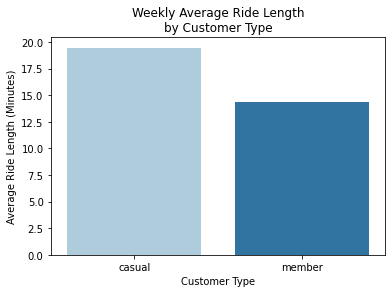

In [30]:
# Visualize
sns.set_palette('Paired')
fig, ax = plt.subplots()
sns.barplot(x=avg_weekly_rides.index, y=avg_weekly_rides)
ax.set_title('Weekly Average Ride Length\nby Customer Type')
ax.set_xlabel('Customer Type')
ax.set_ylabel('Average Ride Length (Minutes)')
fig.show()

Bar chart above shows that **casual riders tend to ride longer than annual members**

#### **2. Is there a correlation between the seasons in chicago and number of rides?**

For this question we need a new column that describes the seasons according to the dates. Based on [seasonsyear.com](https://seasonsyear.com/USA/Illinois/Chicago), there are 4 seasons in Chicago: Spring starts from March until May, Summer starts from June until August, Autumn starts from September until November, and Winter starts from December until February.

In [31]:
# Group data daily and by customer_type
daily_rides_count = bike_data_v3.groupby([pd.Grouper(key='started_at', freq='1D'),'customer_type'])['ride_length'].count().reset_index()

# Rename 'ride_length' column name
daily_rides_count = daily_rides_count.rename(columns={'ride_length':'daily_num_rides'})

# Define function to detect season
def identify_season(month):
    if month == 1 or month == 2 or month == 12:
        season = 'Winter'
    elif month == 3 or month == 4 or month == 5:
        season = 'Spring'
    elif month == 6 or month == 7 or month == 8:
        season = 'Summer'
    elif month == 9 or month == 10 or month == 11:
        season = 'Autumn'
    return season

# Add month, and season_rep columns to weekly_rides 
daily_rides_count['month'] = daily_rides_count['started_at'].dt.month

# Add a new column to weekly_rides dataframe which describes the seasons
season_list = []
for month in daily_rides_count['month']:
    season_list.append(identify_season(month))
    
daily_rides_count['season'] = season_list

In [32]:
# Add season representation column 1=Winter 2=Spring 3=Summer 4=Autumn
daily_rides_count['season_rep'] = daily_rides_count['started_at'].dt.month%12//3+1
daily_rides_count.head()

,started_at,customer_type,daily_num_rides,month,season,season_rep
0,2020-04-01,casual,355,4,Spring,2
1,2020-04-01,member,1839,4,Spring,2
2,2020-04-02,casual,443,4,Spring,2
3,2020-04-02,member,1985,4,Spring,2
4,2020-04-03,casual,786,4,Spring,2


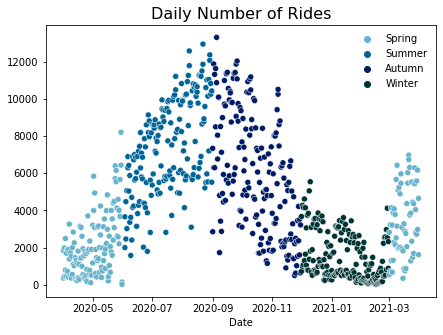

In [33]:
# Visualize
fig2, ax2 = plt.subplots()
fig2.set_size_inches(7,5)
sns.scatterplot(data=daily_rides_count, x='started_at', y='daily_num_rides', hue='season', palette='ocean_r')
ax2.set_title('Daily Number of Rides', fontsize='16')
ax2.set_xlabel('Date')
ax2.set_ylabel('')
ax2.legend(frameon=False)
fig2.show()

In [34]:
# Correlation value
cor = daily_rides_count['daily_num_rides'].corr(daily_rides_count['season_rep'])
print("Correlation between daily number of rides and seasons : ", round(cor,3))

Correlation between daily number of rides and seasons :  0.61


The above chart shows that there is an uptrend between spring and summer, with the peak is on late august. Autumn until Winter, the daily number of rides declines with the bottom is on February. The correlation is also quiet strong with the value of **0.61**. It means that **as the season gets warmer, the number of rides tend to have an uptrend. On the contrary, if the season gets colder, the number of rides tend to have a downtrend.**

#### **3. Is there a correlation between the seasons in chicago and ride length?**

In [35]:
# Group data daily and by customer_type
daily_rlength_avg = bike_data_v3.groupby([pd.Grouper(key='started_at', freq='1D'),'customer_type'])['ride_length'].mean().reset_index()

# Rename 'ride_length' column name
daily_rlength_avg = daily_rlength_avg.rename(columns={'ride_length':'avg_daily_rlength'})

# Add month column to weekly_rides 
daily_rlength_avg['month'] = daily_rlength_avg['started_at'].dt.month
# Add a new column to weekly_rides dataframe which describes the seasons
season_list = []

for month in daily_rlength_avg['month']:
    season_list.append(identify_season(month))
    
daily_rlength_avg['season'] = season_list

In [36]:
daily_rlength_avg['season_rep'] = daily_rlength_avg['started_at'].dt.month%12//3+1
daily_rlength_avg.head()

,started_at,customer_type,avg_daily_rlength,month,season,season_rep
0,2020-04-01,casual,23.412629,4,Spring,2
1,2020-04-01,member,15.199311,4,Spring,2
2,2020-04-02,casual,23.188450,4,Spring,2
3,2020-04-02,member,15.776373,4,Spring,2
4,2020-04-03,casual,24.452587,4,Spring,2


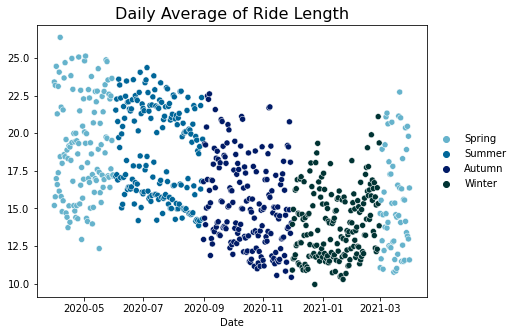

In [37]:
# Visualize
fig3, ax3 = plt.subplots()
fig3.set_size_inches(7,5)
sns.scatterplot(data=daily_rlength_avg, x='started_at', y='avg_daily_rlength', hue='season', palette='ocean_r')
ax3.set_title('Daily Average of Ride Length', fontsize='16')
ax3.set_xlabel('Date')
ax3.set_ylabel('')
ax3.legend(frameon=False, bbox_to_anchor=(1,0.5), loc='center left')
fig3.show()

In [38]:
# Add season representation column 1=Winter 2=Spring 3=Summer 4=Autumn
cor1 = daily_rlength_avg['avg_daily_rlength'].corr(daily_rlength_avg['season_rep'])
print("Correlation between daily average of ride length and seasons : ", round(cor1,3))

Correlation between daily average of ride length and seasons :  0.151


From scatterplot above, we can see that there is a slight decrease in average ride length from Summer until Winter and starts going up again in Spring. But, the correlation value is only **0.151** and it is really close to 0. Therefore we can conclude that **the seasons does not have a strong correlation with daily average of ride length**.

#### **4. What is the average number of rides on each name of the day of the week?**

Since there is a correlation between seasons and number of rides, to answer this question the data will be grouped according to the corresponding season.

In [39]:
# Create a new column with its value ranges from Monday to Sunday
daily_rides_count['day_of_week'] = daily_rides_count['started_at'].dt.day_name()
daily_rides_count['day'] = daily_rides_count['started_at'].dt.dayofweek.astype(int)

daily_rides_count.head()

,started_at,customer_type,daily_num_rides,month,season,season_rep,day_of_week,day
0,2020-04-01,casual,355,4,Spring,2,Wednesday,2
1,2020-04-01,member,1839,4,Spring,2,Wednesday,2
2,2020-04-02,casual,443,4,Spring,2,Thursday,3
3,2020-04-02,member,1985,4,Spring,2,Thursday,3
4,2020-04-03,casual,786,4,Spring,2,Friday,4


In [40]:
# Group data by season and day_of_week
day_rides = daily_rides_count.groupby(['season','day_of_week','day'])['daily_num_rides'].mean().reset_index()

# Sort by day_of_week in ascending order from Monday to Sunday
day_rides = day_rides.sort_values(by='day')
day_rides.head()

,season,day_of_week,day,daily_num_rides
1,Autumn,Monday,0,5083.038462
22,Winter,Monday,0,1421.833333
15,Summer,Monday,0,5951.307692
8,Spring,Monday,0,2415.615385
19,Summer,Tuesday,1,6756.083333


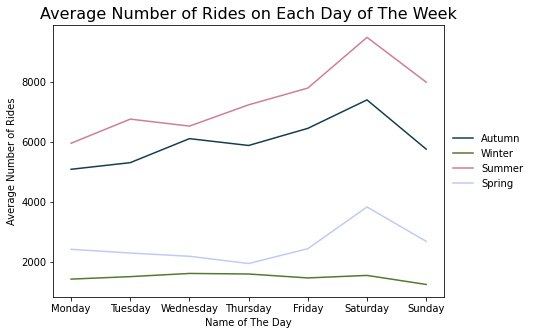

In [41]:
fig4, ax4 = plt.subplots()
fig4.set_size_inches(7,5)
sns.lineplot(x='day_of_week',y='daily_num_rides', hue='season', data=day_rides, palette='cubehelix')
ax4.set_title('Average Number of Rides on Each Day of The Week', fontsize='16')
ax4.set_xlabel('Name of The Day')
ax4.set_ylabel('Average Number of Rides')
ax4.legend(frameon=False, bbox_to_anchor=(1,0.5), loc='center left')
fig4.show()


The linechart above shows that **the number of rides tend to increase on Friday and Saturday in Spring, Summer, and Autumn**.

#### **5. What is the average ride length on each name of the day of the week?**

In [42]:
# Create a new column with its value ranges from Monday to Sunday
daily_rlength_avg['day_of_week'] = daily_rlength_avg['started_at'].dt.day_name()
daily_rlength_avg['day'] = daily_rlength_avg['started_at'].dt.dayofweek.astype(int)

daily_rlength_avg.head()

,started_at,customer_type,avg_daily_rlength,month,season,season_rep,day_of_week,day
0,2020-04-01,casual,23.412629,4,Spring,2,Wednesday,2
1,2020-04-01,member,15.199311,4,Spring,2,Wednesday,2
2,2020-04-02,casual,23.188450,4,Spring,2,Thursday,3
3,2020-04-02,member,15.776373,4,Spring,2,Thursday,3
4,2020-04-03,casual,24.452587,4,Spring,2,Friday,4


In [43]:
# Group data by season and day_of_week
day_rlength = daily_rlength_avg.groupby(['day_of_week','day'])['avg_daily_rlength'].mean().reset_index()

# Sort by day_of_week in ascending order from Monday to Sunday
day_rlength = day_rlength.sort_values(by='day')
day_rlength.head()

,day_of_week,day,avg_daily_rlength
1,Monday,0,16.048630
5,Tuesday,1,15.829268
6,Wednesday,2,15.912646
4,Thursday,3,15.825613
0,Friday,4,16.152774


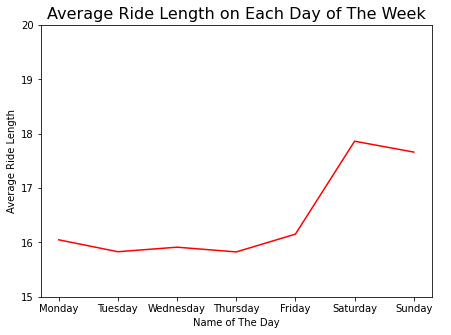

In [44]:
fig5, ax5 = plt.subplots()
fig5.set_size_inches(7,5)
sns.lineplot(x='day_of_week',y='avg_daily_rlength', data=day_rlength, color='red')
ax5.set_title('Average Ride Length on Each Day of The Week', fontsize='16')
ax5.set_xlabel('Name of The Day')
ax5.set_ylabel('Average Ride Length')
ax5.legend(frameon=False, bbox_to_anchor=(1,0.5), loc='center left')
ax5.set(ylim=(15,20))
ax5.yaxis.set_major_formatter(ticker.EngFormatter())
fig5.show()

The chart above also shows that **the average ride length tend to increase on Friday and Saturday**

#### **5. Which stations do casual riders often visit?**

In [45]:
# Group data by start station name
start_stations = bike_data_v3.groupby(['start_station_name','customer_type'])['ride_length'].count().reset_index()
start_stations = start_stations.rename(columns={'ride_length':'num_of_visits'})
start_stations = start_stations[(start_stations['customer_type']=='casual') & 
                                (start_stations['start_station_name']!='Unknown')].sort_values(by='num_of_visits', ascending=False)
start_stations = start_stations.head()
start_stations

,start_station_name,customer_type,num_of_visits
1195,Streeter Dr & Grand Av,casual,19279
721,Lake Shore Dr & Monroe St,casual,15100
883,Millennium Park,casual,13181
1201,Theater on the Lak,casual,12391
269,Clark St & Elm St,casual,10615


In [46]:
# Group data by end station name
end_stations = bike_data_v3.groupby(['end_station_name','customer_type'])['ride_length'].count().reset_index()
end_stations = end_stations.rename(columns={'ride_length':'num_of_visits'})
end_stations = end_stations[(end_stations['customer_type']=='casual') & 
                                (end_stations['end_station_name']!='Unknown')].sort_values(by='num_of_visits', ascending=False)
end_stations = end_stations.head()
end_stations

,end_station_name,customer_type,num_of_visits
1193,Streeter Dr & Grand Av,casual,20523
881,Millennium Park,casual,14272
720,Lake Shore Dr & Monroe St,casual,14251
1199,Theater on the Lak,casual,13442
722,Lake Shore Dr & North Blvd,casual,11020


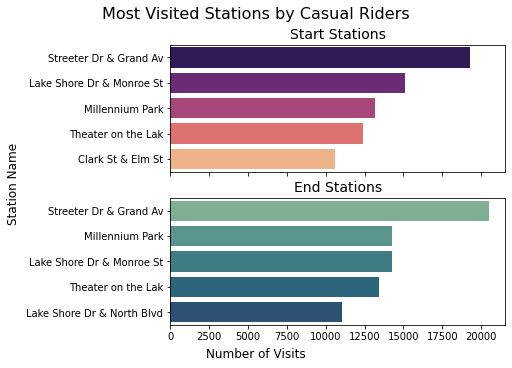

In [47]:
fig6, ax6 = plt.subplots(nrows=2, constrained_layout=True,sharex=True)
fig6.set_size_inches(7,5)
fig6.suptitle('Most Visited Stations by Casual Riders', fontsize=16)
sns.barplot(x= 'num_of_visits', y='start_station_name', data = start_stations, palette='magma', ax=ax6[0])
sns.barplot(x= 'num_of_visits', y='end_station_name', data = end_stations, palette='crest', ax=ax6[1])
ax6[0].set_title('Start Stations', fontsize=14)
ax6[1].set_title('End Stations', fontsize=14)
ax6[0].set_xlabel('')
ax6[0].set_ylabel('')
ax6[1].set_xlabel('')
ax6[1].set_ylabel('')
fig6.supxlabel('Number of Visits')
fig6.supylabel('Station Name')
fig6.show()

Horizontal barcharts above show that **most casual riders starts or ends their trip in recreational areas**. Note: Trip data which have missing start and end station name are not included for this question.

### **Conclusion**
From the analysis, we can conclude:
1. Casual riders have the longest ride length with an average of 19.45 minutes, while annual members have an average of 14.33 minutes.
2. There is a quite strong correlation between seasons and number of rides.
3. There is no strong correlation between seasons and ride length.
4. The number of rides increases on Friday and Saturday with the peak is on Saturday.
5. The Ride length increases on Friday, Saturday, and Sunday with the peak is on Saturday.
6. Most casual riders starts or ends their trip in recreational areas

### **Recommendation**
Marketing strategies to convert casual riders into annual members:
1. Create a seasonal discount for new members (Ex: Summer special price, Spring special offers: Buy 12 months membership get free 1 month membership)
2. Members only discount price for ride length more than 45 minutes on Friday-Sunday. (Ex: discount from 0.17 dollar/min to 0.14 dollar/min)
3. Cooperate with recreational places to get special ticket price / food discount for new divvy members.
4. Place promotional membership invitation advertisements on most visited stations by casual riders.